Proyecto N°1 Clustering de canciones de Ed Sheran


In [ ]:
## Cargando las librerias requeridas
## ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns
from pandas import DataFrame
from plotnine import *
from tqdm import tqdm

## Librerias para métodos de Clustering utilizados
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import tree

In [ ]:
#Instalando una nueva libreria
# import sys
# !{sys.executable} -m pip install spotipy
!pip3 install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 7.6 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 246 kB 40.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#Conectandose con spotify
cid = '7ef0bc83dee74b9db739d8da76170c46'
secret = '6e6a9c04bfb44088ac26571496ac4302'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
# Ejemplo de una busqueda
sp

In [ ]:
uri_Ed_Sheeran = 'spotify:album:3T4tUhGYeRNVUGevb0wThu'
dict_Ed_Sheeran = sp.album_tracks(uri_Ed_Sheeran)
print(dict_Ed_Sheeran.keys())

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])


In [ ]:
list_Ed_Sheeran_canciones = dict_Ed_Sheeran['items']
print(f"El album tiene {len(list_Ed_Sheeran_canciones)} canciones")

El album tiene 16 canciones


In [ ]:
dict_primera_cancion = list_Ed_Sheeran_canciones[0]
print(dict_primera_cancion.keys())

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])


In [ ]:
list_names_songs = []
list_uri_songs = []
list_duration_ms = []

for cancion in list_Ed_Sheeran_canciones:
    list_names_songs.append(cancion['name'])
    list_uri_songs.append(cancion['uri'])
    list_duration_ms.append(cancion['duration_ms'])

In [ ]:
list_audio_features_canciones = sp.audio_features(list_uri_songs)

In [ ]:
dict_primer_elemento_list_audio_features = list_audio_features_canciones[0]
print(dict_primer_elemento_list_audio_features.keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [ ]:
dict_canciones_caracteristicas = dict(
    # Bueno, name no es lista vacia
    # pero las demás si
    name = list_names_songs,
    danceability = [],
    energy = [],
    key = [],
    loudness = [],
    mode = [],
    speechiness = [],
    acousticness = [],
    instrumentalness = [],
    liveness = [],
    valence = [],
    tempo = [],
    duration_ms = []
)

In [ ]:
# Primera iteraciòn: a través de los elementos de la lista de audio features
for dict_audio_features_cancion in list_audio_features_canciones:
    # Segunda iteración: a través de las llaves del diccionario
    for llave in dict_audio_features_cancion:
        # Revisamos si una de sus llaves esta en dict_canciones_caracteristicas
        if llave in list(dict_canciones_caracteristicas.keys()):
            # Si está, se guarda el audio feature en la llave correcta
            dict_canciones_caracteristicas[llave].append(dict_audio_features_cancion[llave])

In [ ]:
## CONVERTIMOS LOS DATOS EN UN DATA FRAME

In [ ]:
df = pd.DataFrame(dict_canciones_caracteristicas)
df

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Eraser,0.640,0.812,8,-5.647,0,0.0834,0.0860,0.000000,0.0509,0.914,86.013,227427
1,Castle on the Hill,0.461,0.834,2,-4.868,1,0.0989,0.0232,0.000011,0.1400,0.471,135.007,261154
2,Dive,0.761,0.386,4,-6.158,1,0.0399,0.3550,0.000000,0.0953,0.526,134.943,238440
3,Shape of You,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713
4,Perfect,0.599,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050,263400
5,Galway Girl,0.624,0.876,9,-3.374,1,0.1000,0.0735,0.000000,0.3270,0.781,99.943,170827
6,Happier,0.522,0.385,0,-7.355,1,0.0288,0.5360,0.000000,0.1350,0.236,89.792,207520
7,New Man,0.780,0.745,7,-3.970,1,0.1450,0.0559,0.000000,0.0595,0.862,94.026,189280
8,Hearts Don't Break Around Here,0.604,0.366,7,-7.881,1,0.0267,0.7190,0.000000,0.1620,0.181,105.177,248413
9,What Do I Know?,0.838,0.492,1,-5.690,0,0.0380,0.2510,0.000000,0.2620,0.895,115.092,237333


In [ ]:
## Comprobar valores nulos
## ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16 non-null     object 
 1   danceability      16 non-null     float64
 2   energy            16 non-null     float64
 3   key               16 non-null     int64  
 4   loudness          16 non-null     float64
 5   mode              16 non-null     int64  
 6   speechiness       16 non-null     float64
 7   acousticness      16 non-null     float64
 8   instrumentalness  16 non-null     float64
 9   liveness          16 non-null     float64
 10  valence           16 non-null     float64
 11  tempo             16 non-null     float64
 12  duration_ms       16 non-null     int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.8+ KB


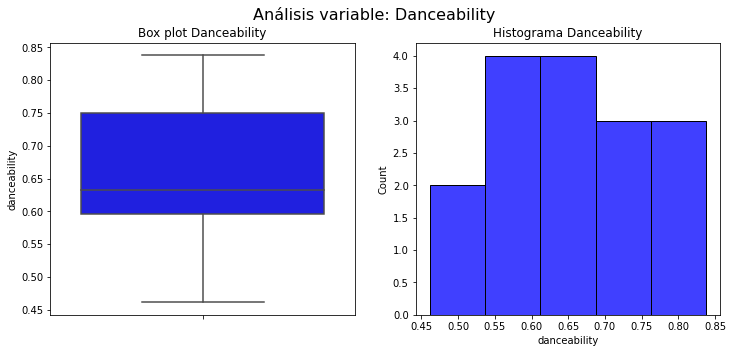

In [ ]:
## Distribución de la varaible 'danceability'
## ==============================================================================
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (12,5))

sns.boxplot(y= df['danceability'], ax = ax[0], color = 'blue')
sns.histplot(x  = df['danceability'], ax = ax[1], color = 'blue')
fig.suptitle('Análisis variable: Danceability', fontsize=16)
ax[0].title.set_text('Box plot Danceability')
ax[1].title.set_text('Histograma Danceability')
plt.show()

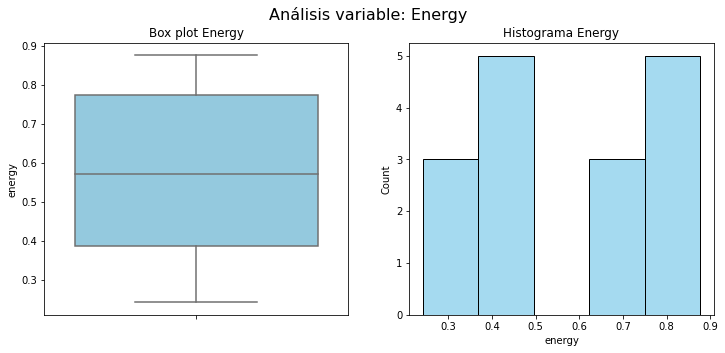

In [ ]:
## Distribución de la variable 'energy'
## ==============================================================================
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (12,5))

sns.boxplot(y= df['energy'], ax = ax[0], color = 'skyblue')
sns.histplot(x  = df['energy'], ax = ax[1], color = 'skyblue')
fig.suptitle('Análisis variable: Energy', fontsize=16)
ax[0].title.set_text('Box plot Energy')
ax[1].title.set_text('Histograma Energy')
plt.show()

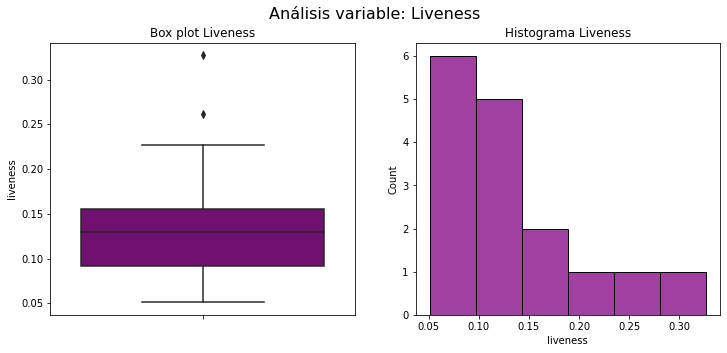

In [ ]:
## Analisis de la variable 'liveness'
## ==============================================================================
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (12,5))

sns.boxplot(y= df['liveness'], ax = ax[0], color = 'purple')
sns.histplot(x  = df['liveness'], ax = ax[1], color = 'purple')
fig.suptitle('Análisis variable: Liveness', fontsize=16)
ax[0].title.set_text('Box plot Liveness')
ax[1].title.set_text('Histograma Liveness')
plt.show()

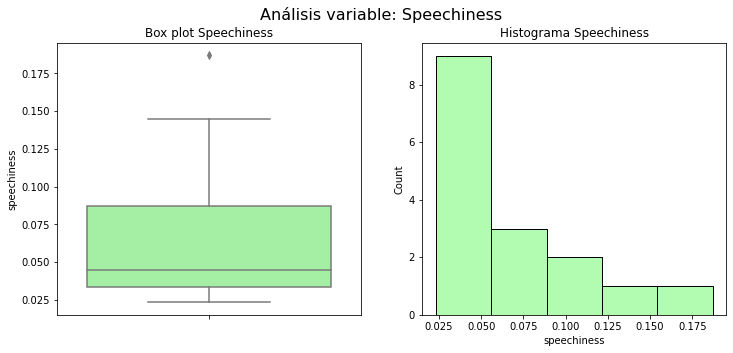

In [ ]:
## Analisis de la variable 'Speechiness'
## ==============================================================================
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (12,5))

sns.boxplot(y= df['speechiness'], ax = ax[0], color = 'palegreen')
sns.histplot(x  = df['speechiness'], ax = ax[1], color = 'palegreen')
fig.suptitle('Análisis variable: Speechiness', fontsize=16)
ax[0].title.set_text('Box plot Speechiness')
ax[1].title.set_text('Histograma Speechiness')
plt.show()

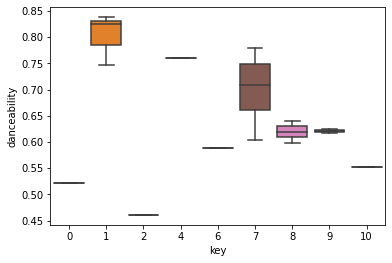

In [ ]:
sns.boxplot(x = df['key'], y = df['danceability'])

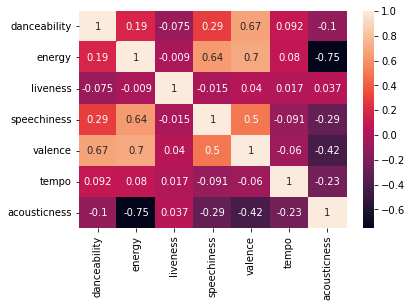

In [ ]:
## Correlacion entre las varaibles numéricas
## ==============================================================================
#numericas = ['danceability','energy','liveness','speechiness','valence','duration_ms','tempo','acousticness']
numericas = ['danceability','energy','liveness','speechiness','valence','tempo','acousticness']
#sns.heatmap(dataFinal[numericas].corr())
sns.heatmap(round(df[numericas].corr(),3), annot = True)

In [ ]:
## Escalamiento de la data seleccionada.
## Se realizará una estandarización de los datos (media 0, varianza 1)
## ==============================================================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
data_scalada = scaler.fit_transform(df[numericas]) #estandarización los datos (media 0, varianza 1)
#pd.DataFrame(data_scalada, columns=dataFinal.columns)
#data_scalada = DataFrame(data_scalada, columns=dataFinal.columns)
#data_scalada = dataFinal[columnas_modelo]
data_scalada = pd.DataFrame(data_scalada, columns = numericas, index = df.index)
data_scalada.head()

,danceability,energy,liveness,speechiness,valence,tempo,acousticness
0,-0.196785,1.101516,-1.238119,0.341663,1.142706,-1.055651,-1.056638
1,-1.869167,1.205299,-0.005275,0.680456,-0.398002,1.593145,-1.280599
2,0.933708,-0.908102,-0.623773,-0.609146,-0.206717,1.589685,-0.097314
3,1.531654,0.346730,-0.654213,0.271718,1.201830,-0.516960,0.708660
4,-0.579845,-0.615623,-0.475721,-0.974169,-1.451804,-0.567077,-0.782036


In [ ]:
## Resumen de la data escalada
## ==============================================================================
data_scalada.describe()
round(data_scalada,2).describe()

,danceability,energy,liveness,speechiness,valence,tempo,acousticness
count,16.000000,1.600000e+01,16.000000,16.000000,1.600000e+01,16.000000,1.600000e+01
mean,-0.000625,-4.163336e-17,-0.000625,0.000000,1.387779e-17,0.000000,-2.775558e-17
std,1.031998,1.033376e+00,1.032282,1.033131,1.032712e+00,1.031833,1.033454e+00
min,-1.870000,-1.590000e+00,-1.240000,-0.970000,-1.450000e+00,-1.440000,-1.280000e+00
25%,-0.602500,-9.100000e-01,-0.667500,-0.752500,-1.152500e+00,-0.677500,-9.775000e-01
50%,-0.275000,-3.000000e-02,-0.145000,-0.510000,6.500000e-02,-0.300000,2.500000e-02
75%,0.832500,9.200000e-01,0.202500,0.425000,9.775000e-01,0.680000,5.900000e-01
max,1.650000,1.400000e+00,2.580000,2.610000,1.200000e+00,1.860000,1.900000e+00


In [ ]:
## Buscamos el mejor numero de clusters
## Función que grafica a través del método del "codo", el mejor número de clusters "k" 
## ==============================================================================
def graficar_codo(numK,data_scalada):
    sse = [] #Variable para guardar el within cluster distance
    #numK = 20
    for k in range(1, numK): #número de cluster a probar
        #Creando el modelo, entrenandolo y obteniendo el valor del within cluster distance
        modelo_KM = KMeans(n_clusters=k)
        modelo_KM.fit(data_scalada)
        sse.append(modelo_KM.inertia_)
    fig = pd.DataFrame(sse, index=np.arange(1,numK)).plot()
    return fig
    

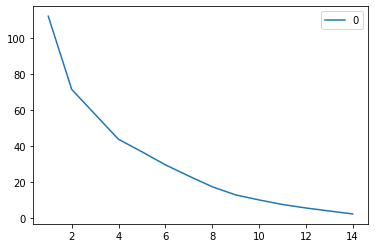

In [ ]:
## Gráfica de codo 
## ==============================================================================
graficar_codo(15,data_scalada)

Ségun el resultado de la gráfica podemos observar el quiebre se presenta cerca del punto = 4, por lo que se define utilizar este valor para "k" en el entrenamiento mediante KMeans

In [ ]:
## Llamada a método KMeans y ajuste del modelo
## ==============================================================================
modelo_KM = KMeans(n_clusters=4)

## Ajuste del modelo
modelo_KM.fit (data_scalada)

## Impresion de la inercia
print(modelo_KM.inertia_)

clases_km = pd.DataFrame(modelo_KM.labels_,index = data_scalada.index)

45.86516683371312


In [ ]:
## Agregamos la columna "clases" a la data
## ==============================================================================

reporte_km = data_scalada.copy()
reporte_km['clases'] = clases_km
reporte_km.head()

,danceability,energy,liveness,speechiness,valence,tempo,acousticness,clases
0,-0.196785,1.101516,-1.238119,0.341663,1.142706,-1.055651,-1.056638,0
1,-1.869167,1.205299,-0.005275,0.680456,-0.398002,1.593145,-1.280599,2
2,0.933708,-0.908102,-0.623773,-0.609146,-0.206717,1.589685,-0.097314,3
3,1.531654,0.346730,-0.654213,0.271718,1.201830,-0.516960,0.708660,0
4,-0.579845,-0.615623,-0.475721,-0.974169,-1.451804,-0.567077,-0.782036,3


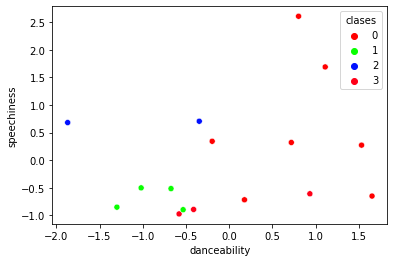

In [ ]:
sns.scatterplot(x = reporte_km['danceability'], y = reporte_km['speechiness'], hue = reporte_km['clases'], palette='hsv')

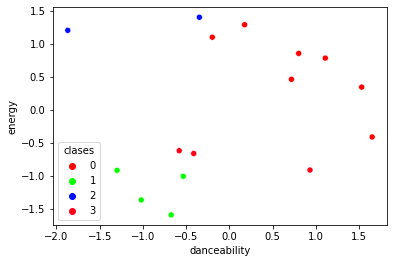

In [ ]:
sns.scatterplot(x = reporte_km['danceability'], y = reporte_km['energy'], hue = reporte_km['clases'],palette='hsv')

In [ ]:
## Aplicamos PCA a la data escalada
## ==============================================================================

pca = PCA(n_components=2)
pca.fit(data_scalada)
data_pca = pd.DataFrame(pca.transform(data_scalada), index = data_scalada.index)
data_pca.head(3)

,0,1
0,-1.648427,-0.275818
1,-0.730275,2.719028
2,0.409850,0.566698


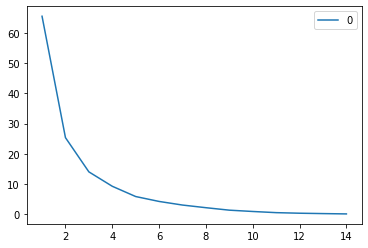

In [ ]:
## Gráfica de codo con resultado del análisis PCA
## ==============================================================================
graficar_codo(15,data_pca)

In [ ]:
## Aplicamos KMeans con la data resultante del PCA
## ==============================================================================
modelo_KM_pca = KMeans(n_clusters=4)

## Ajuste del modelo
modelo_KM_pca.fit (data_pca)
print(modelo_KM_pca.inertia_)
clases_km_pca = pd.DataFrame(modelo_KM_pca.labels_,index = data_scalada.index)
reporte_km_pca = data_scalada.copy()
reporte_km_pca['clases'] = clases_km_pca
reporte_km_pca.head()

9.222156328250135


,danceability,energy,liveness,speechiness,valence,tempo,acousticness,clases
0,-0.196785,1.101516,-1.238119,0.341663,1.142706,-1.055651,-1.056638,0
1,-1.869167,1.205299,-0.005275,0.680456,-0.398002,1.593145,-1.280599,2
2,0.933708,-0.908102,-0.623773,-0.609146,-0.206717,1.589685,-0.097314,3
3,1.531654,0.346730,-0.654213,0.271718,1.201830,-0.516960,0.708660,0
4,-0.579845,-0.615623,-0.475721,-0.974169,-1.451804,-0.567077,-0.782036,3


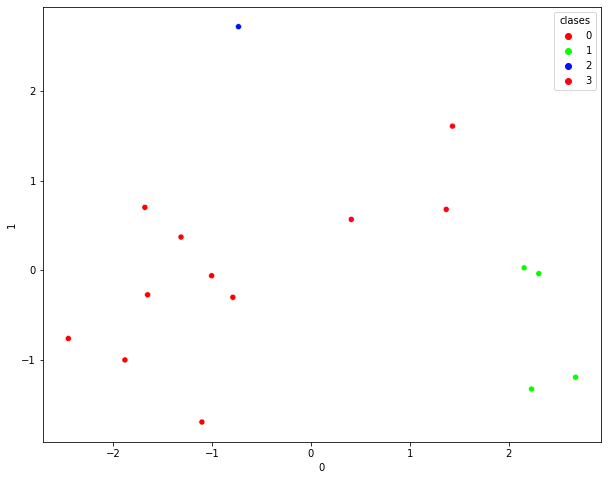

In [ ]:
#sns.set_style("whitegrid")
data_pca['clases'] = clases_km_pca
fig, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = data_pca[0], y = data_pca[1], hue = data_pca['clases'], palette='hsv')

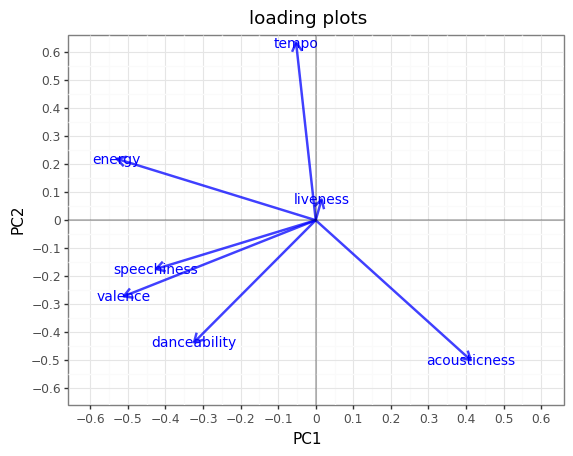

<ggplot: (8730702293197)>

In [ ]:
#Analizando los componentes
## ==============================================================================
data_pca = pd.DataFrame(pca.components_.transpose(),columns=["PC1","PC2"])
data_pca['varNames']=data_scalada.columns
(ggplot(data_pca)+
  theme_bw()+
  labs(title="loading plots")+
  geom_text(aes(x="PC1", y="PC2", label="varNames"), size = 10, color="blue")+
  geom_segment(aes(x=0, y=0, xend="PC1", yend="PC2"), arrow=arrow(length=0.1),size=1, alpha=0.75, color="blue")+
  scale_x_continuous(limits=[-0.9,0.9],breaks=[-1,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,1])+
  scale_y_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  geom_hline(yintercept = 0, size=.2)+
  geom_vline(xintercept = 0, size=.2)+
  coord_cartesian([-0.6,0.6],[-0.6,0.6])
)